In [3]:
#!pip install catboost

import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.metrics import mean_squared_log_error, mean_absolute_percentage_error, r2_score

In [4]:
df=pd.read_csv("cleaned_train.csv")
df.head()

,Unnamed: 0,OverallQual,GrLivArea,GarageCars,ExterQual,GarageArea,BsmtQual,TotalBsmtSF,1stFlrSF,KitchenQual,FullBath,GarageFinish,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,SalePrice
0,0,6,1710,2,2,548,2,856,856,2,2,1,8,2003,2003,196.0,208500
1,1,5,1262,2,3,460,2,1262,1262,3,2,1,6,1976,1976,0.0,181500
2,2,6,1786,2,2,608,2,920,920,2,2,1,6,2001,2002,162.0,223500
3,3,6,1717,3,3,642,3,756,961,2,1,2,7,1915,1970,0.0,140000
4,4,7,2198,3,2,836,2,1145,1145,2,2,1,9,2000,2000,350.0,250000


In [5]:
# Split data into features and target variable
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [6]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:

param_grid = {
    'iterations': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
}

# Initialize CatBoostRegressor
catboost = CatBoostRegressor(loss_function='RMSE', random_seed=42, verbose=False)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error',refit=True, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)
print("Best Parameters:", best_params)
# Make predictions using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)



Fitting 10 folds for each of 81 candidates, totalling 810 fits
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.4s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.1s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.1s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.2s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.2s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.2s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.2s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.2s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.2s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.2s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning

[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.01; total time=   1.0s
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.01; total time=   1.0s
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.01; total time=   1.0s
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.01; total time=   1.0s
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.01; total time=   1.0s
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.01; total time=   1.0s
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.01; total time=   1.0s
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.05; total time=   1.0s
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.05; total time=   1.0s
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.05; total time=   0.9s
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.05; total time=   0.9s
[CV] END depth=4, iterations=500

[CV] END depth=4, iterations=1000, l2_leaf_reg=1, learning_rate=0.01; total time=   2.0s
[CV] END depth=4, iterations=1000, l2_leaf_reg=1, learning_rate=0.01; total time=   1.9s
[CV] END depth=4, iterations=1000, l2_leaf_reg=1, learning_rate=0.01; total time=   1.9s
[CV] END depth=4, iterations=1000, l2_leaf_reg=1, learning_rate=0.05; total time=   2.0s
[CV] END depth=4, iterations=1000, l2_leaf_reg=1, learning_rate=0.05; total time=   2.0s
[CV] END depth=4, iterations=1000, l2_leaf_reg=1, learning_rate=0.05; total time=   1.9s
[CV] END depth=4, iterations=1000, l2_leaf_reg=1, learning_rate=0.05; total time=   1.9s
[CV] END depth=4, iterations=1000, l2_leaf_reg=1, learning_rate=0.05; total time=   1.9s
[CV] END depth=4, iterations=1000, l2_leaf_reg=1, learning_rate=0.05; total time=   1.9s
[CV] END depth=4, iterations=1000, l2_leaf_reg=1, learning_rate=0.05; total time=   1.9s
[CV] END depth=4, iterations=1000, l2_leaf_reg=1, learning_rate=0.05; total time=   2.0s
[CV] END depth=4, ite

[CV] END depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   0.3s
[CV] END depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   0.3s
[CV] END depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   0.3s
[CV] END depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   0.3s
[CV] END depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   0.5s
[CV] END depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   0.4s
[CV] END depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   0.3s
[CV] END depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   0.3s
[CV] END depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   0.3s
[CV] END depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   0.3s
[CV] END depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   0.3s
[CV] END depth=6, iterations=100,

[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.05; total time=   1.7s
[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.05; total time=   1.7s
[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.05; total time=   1.7s
[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.05; total time=   1.7s
[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.05; total time=   1.7s
[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.05; total time=   1.6s
[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.1; total time=   1.7s
[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.1; total time=   1.7s
[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.1; total time=   1.7s
[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.1; total time=   1.7s
[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.1; total time=   1.7s
[CV] END depth=6, iterations=500, l2_

[CV] END depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.05; total time=   3.4s
[CV] END depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.05; total time=   3.4s
[CV] END depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.1; total time=   3.4s
[CV] END depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.1; total time=   3.5s
[CV] END depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.1; total time=   3.4s
[CV] END depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.1; total time=   3.4s
[CV] END depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.1; total time=   3.4s
[CV] END depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.1; total time=   3.4s
[CV] END depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.1; total time=   3.4s
[CV] END depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.1; total time=   3.4s
[CV] END depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.1; total time=   3.4s
[CV] END depth=6, iterations=1

[CV] END depth=8, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   0.8s
[CV] END depth=8, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   0.7s
[CV] END depth=8, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   0.8s
[CV] END depth=8, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   0.8s
[CV] END depth=8, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   0.8s
[CV] END depth=8, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   0.8s
[CV] END depth=8, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   0.8s
[CV] END depth=8, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   0.8s
[CV] END depth=8, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   0.8s
[CV] END depth=8, iterations=100, l2_leaf_reg=3, learning_rate=0.01; total time=   0.8s
[CV] END depth=8, iterations=100, l2_leaf_reg=3, learning_rate=0.01; total time=   0.8s
[CV] END depth=8, iterations=100, l2_leaf

[CV] END depth=8, iterations=500, l2_leaf_reg=1, learning_rate=0.1; total time=   4.0s
[CV] END depth=8, iterations=500, l2_leaf_reg=1, learning_rate=0.1; total time=   4.0s
[CV] END depth=8, iterations=500, l2_leaf_reg=1, learning_rate=0.1; total time=   4.0s
[CV] END depth=8, iterations=500, l2_leaf_reg=1, learning_rate=0.1; total time=   3.9s
[CV] END depth=8, iterations=500, l2_leaf_reg=1, learning_rate=0.1; total time=   4.0s
[CV] END depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.01; total time=   4.0s
[CV] END depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.01; total time=   4.0s
[CV] END depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.01; total time=   3.9s
[CV] END depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.01; total time=   4.0s
[CV] END depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.01; total time=   3.9s
[CV] END depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.01; total time=   4.0s
[CV] END depth=8, iterations=500, l2_

[CV] END depth=8, iterations=1000, l2_leaf_reg=1, learning_rate=0.1; total time=   8.7s
[CV] END depth=8, iterations=1000, l2_leaf_reg=3, learning_rate=0.01; total time=   8.4s
[CV] END depth=8, iterations=1000, l2_leaf_reg=3, learning_rate=0.01; total time=   8.3s
[CV] END depth=8, iterations=1000, l2_leaf_reg=3, learning_rate=0.01; total time=   8.4s
[CV] END depth=8, iterations=1000, l2_leaf_reg=3, learning_rate=0.01; total time=   8.3s
[CV] END depth=8, iterations=1000, l2_leaf_reg=3, learning_rate=0.01; total time=   8.3s
[CV] END depth=8, iterations=1000, l2_leaf_reg=3, learning_rate=0.01; total time=   8.3s
[CV] END depth=8, iterations=1000, l2_leaf_reg=3, learning_rate=0.01; total time=   8.3s
[CV] END depth=8, iterations=1000, l2_leaf_reg=3, learning_rate=0.01; total time=   8.3s
[CV] END depth=8, iterations=1000, l2_leaf_reg=3, learning_rate=0.01; total time=   7.9s
[CV] END depth=8, iterations=1000, l2_leaf_reg=3, learning_rate=0.01; total time=   7.8s
[CV] END depth=8, iter

In [8]:
mse = mean_squared_log_error(y_test,y_pred)
mae = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 0.11311582374349319
Mean Squared Error: 0.024817459017091252
R-squared: 0.7873659043066703


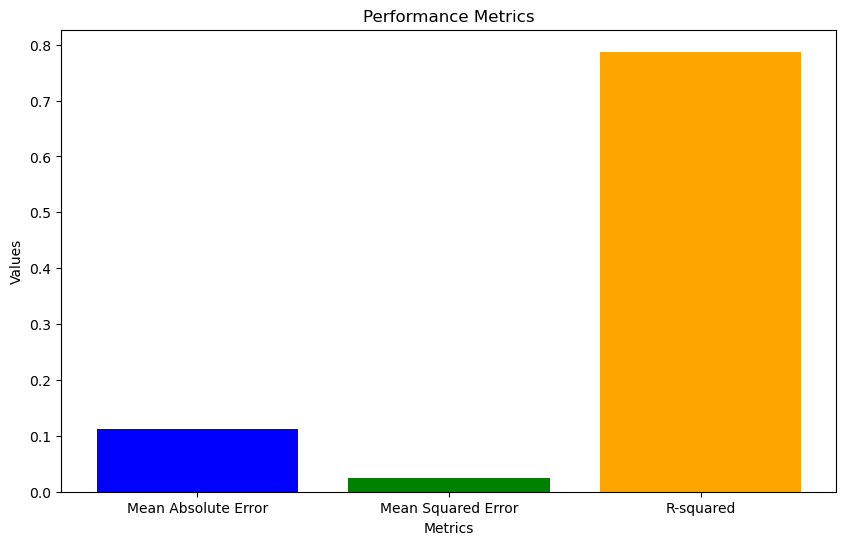

In [9]:
import matplotlib.pyplot as plt
metrics = ['Mean Absolute Error', 'Mean Squared Error', 'R-squared']
values = [mae, mse, r2]
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics')
plt.savefig("catboost.png")
plt.show()
